In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import numpy as np
import pandas as pd

import math
import cv2
from glob import glob
import itertools
import os

In [3]:
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import BatchNormalization
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau,CSVLogger

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from tensorflow.python.framework import ops
ops.reset_default_graph()

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 10]
plt.rcParams['font.size'] = 16

Using TensorFlow backend.


In [4]:
# Global Variables
SCALE = 70
SEED = 7
np.random.seed(SEED)

In [5]:
#List of Classes/Labels
os.listdir("./train")

['Black-grass',
 'Charlock',
 'Cleavers',
 'Common Chickweed',
 'Common wheat',
 'Fat Hen',
 'Loose Silky-bent',
 'Maize',
 'Scentless Mayweed',
 'Shepherds Purse',
 'Small-flowered Cranesbill',
 'Sugar beet']

In [6]:
path_to_train = 'train/*/*.png'
path_to_test = 'test/*.png'

images_train = glob(path_to_train)
images_test  = glob(path_to_test)
number_train = len(images_train)
number_test  = len(images_test)

trainSet = []
trainLabels = []
testSet = []
tests = []

In [7]:
images_train

['train\\Black-grass\\0050f38b3.png',
 'train\\Black-grass\\0183fdf68.png',
 'train\\Black-grass\\0260cffa8.png',
 'train\\Black-grass\\05eedce4d.png',
 'train\\Black-grass\\075d004bc.png',
 'train\\Black-grass\\078eae073.png',
 'train\\Black-grass\\082314602.png',
 'train\\Black-grass\\0ace21089.png',
 'train\\Black-grass\\0b228a6b8.png',
 'train\\Black-grass\\0b3e7a7a9.png',
 'train\\Black-grass\\0bb75ded8.png',
 'train\\Black-grass\\0be707615.png',
 'train\\Black-grass\\0c67c3fc3.png',
 'train\\Black-grass\\0d1a9985f.png',
 'train\\Black-grass\\0d28c429b.png',
 'train\\Black-grass\\0d4f74f4a.png',
 'train\\Black-grass\\0dad57e7f.png',
 'train\\Black-grass\\0e91f92a1.png',
 'train\\Black-grass\\0fe440ed5.png',
 'train\\Black-grass\\1276dffba.png',
 'train\\Black-grass\\129c51855.png',
 'train\\Black-grass\\13a7f553a.png',
 'train\\Black-grass\\14719a83e.png',
 'train\\Black-grass\\1576ce9fd.png',
 'train\\Black-grass\\163c13912.png',
 'train\\Black-grass\\163e571a6.png',
 'train\\Bla

In [8]:
trainSet

[]

In [9]:
# Split Training Set of Images from Data
count = 1
for i in images_train:
    print(str(count)+'/'+str(number_train),end='\r')
    trainSet.append(cv2.resize(cv2.imread(i),(SCALE,SCALE)))
    count = count + 1
trainSet = np.asarray(trainSet)

In [10]:
trainSet

array([[[[ 22,  46,  77],
         [ 38,  60,  83],
         [ 69,  88, 107],
         ...,
         [ 75,  87,  98],
         [ 55,  75,  86],
         [ 58,  82,  91]],

        [[ 27,  50,  83],
         [ 46,  65,  90],
         [ 30,  50,  75],
         ...,
         [ 63,  76,  89],
         [ 58,  72,  83],
         [ 59,  74,  86]],

        [[ 33,  58,  87],
         [ 28,  50,  78],
         [ 31,  52,  76],
         ...,
         [ 64,  76,  91],
         [ 57,  69,  83],
         [ 52,  67,  80]],

        ...,

        [[156, 149, 143],
         [153, 146, 142],
         [106, 100,  99],
         ...,
         [156, 149, 144],
         [145, 138, 135],
         [ 69,  62,  71]],

        [[157, 150, 144],
         [152, 146, 141],
         [106,  99,  99],
         ...,
         [159, 151, 147],
         [147, 140, 136],
         [ 71,  66,  71]],

        [[156, 150, 143],
         [151, 146, 139],
         [101,  97,  96],
         ...,
         [159, 150, 144],
        

In [11]:
images_train[0].split('\\')

['train', 'Black-grass', '0050f38b3.png']

In [12]:
trainLabels

[]

In [13]:
# Split Training Labels of Images from Data
count = 1
for i in images_train:
    trainLabels.append(i.split('\\')[-2])
    count = count + 1

trainLabels = pd.DataFrame(trainLabels)

In [14]:
trainLabels

,0
0,Black-grass
1,Black-grass
2,Black-grass
3,Black-grass
4,Black-grass
5,Black-grass
6,Black-grass
7,Black-grass
8,Black-grass
9,Black-grass


In [15]:
#Number of training images
print('Number of Training images : ', number_train)
print('Number of Training Sets : ', len(trainSet))
print('Number of Training Labels : ', len(trainLabels))

Number of Training images :  4750
Number of Training Sets :  4750
Number of Training Labels :  4750


In [16]:
images_test

['test\\0021e90e4.png',
 'test\\003d61042.png',
 'test\\007b3da8b.png',
 'test\\0086a6340.png',
 'test\\00c47e980.png',
 'test\\00d090cde.png',
 'test\\00ef713a8.png',
 'test\\01291174f.png',
 'test\\026716f9b.png',
 'test\\02cfeb38d.png',
 'test\\03566743d.png',
 'test\\03a2ee656.png',
 'test\\03e322a29.png',
 'test\\03ef36742.png',
 'test\\043449b0b.png',
 'test\\0437393b1.png',
 'test\\04814f36d.png',
 'test\\05341a8a6.png',
 'test\\060450d79.png',
 'test\\060f1dc84.png',
 'test\\0625f063b.png',
 'test\\063363305.png',
 'test\\06d12f6fa.png',
 'test\\071cb3ece.png',
 'test\\0751c0bbc.png',
 'test\\07e62f903.png',
 'test\\085974290.png',
 'test\\0885e7690.png',
 'test\\089ad62a7.png',
 'test\\08d591441.png',
 'test\\0911d3dee.png',
 'test\\099b961ec.png',
 'test\\0a64e3e6c.png',
 'test\\0ad9e7dfb.png',
 'test\\0ae6668fa.png',
 'test\\0bf7bfb05.png',
 'test\\0c27cf05f.png',
 'test\\0c4199daa.png',
 'test\\0c45ace27.png',
 'test\\0c51bf229.png',
 'test\\0c5f6c493.png',
 'test\\0caeda5d

In [17]:
count = 1
for i in images_test:
    print(str(count)+'/'+str(number_test),end='\r')
    tests.append(i.split('/')[-1])
    testSet.append(cv2.resize(cv2.imread(i),(SCALE,SCALE)))
    count = count + 1
testSet = np.asarray(testSet)


In [18]:
print('Number of Images : ', number_test)
print('Number of Test Set Images : ', len(testSet))

Number of Images :  794
Number of Test Set Images :  794


(388, 388, 3) (70, 70, 3)


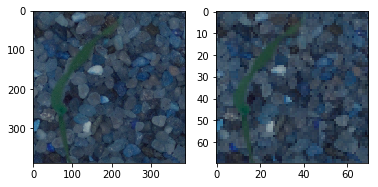

In [19]:
#View one sample image
sampleImageScale = trainSet[1]
sampleImageOriginal = cv2.imread(images_train[1])
print(sampleImageOriginal.shape, sampleImageScale.shape)
plt.subplot(1,2,1)
plt.imshow(sampleImageOriginal)
plt.subplot(1,2,2)
plt.imshow(sampleImageScale)

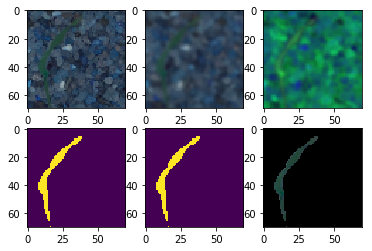

In [20]:
#Experiment preprocessing with one sample image
blurr = cv2.GaussianBlur(sampleImageScale,(5,5),0)
hsv = cv2.cvtColor(blurr,cv2.COLOR_BGR2HSV)
#GREEN PARAMETERS
lower = (25,40,50)
upper = (75,255,255)
mask = cv2.inRange(hsv,lower,upper)
struc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11))
mask = cv2.morphologyEx(mask,cv2.MORPH_CLOSE,struc)
boolean = mask>0
new = np.zeros_like(sampleImageScale,np.uint8)
new[boolean] = sampleImageScale[boolean]
plt.subplot(2,3,1);plt.imshow(sampleImageScale) # ORIGINAL
plt.subplot(2,3,2);plt.imshow(blurr) # BLURRED
plt.subplot(2,3,3);plt.imshow(hsv) # HSV CONVERTED
plt.subplot(2,3,4);plt.imshow(mask) # MASKED
plt.subplot(2,3,5);plt.imshow(boolean) # BOOLEAN MASKED
plt.subplot(2,3,6);plt.imshow(new) # NEW PROCESSED IMAGE
plt.show()

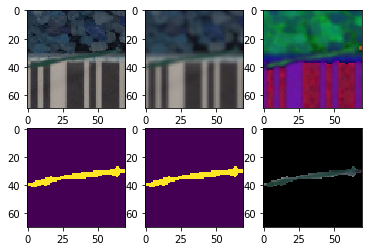

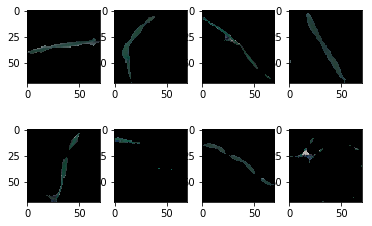

In [21]:
train_new = []
getEx = True

for i in trainSet:
    blurr = cv2.GaussianBlur(i, (5, 5), 0)
    hsv = cv2.cvtColor(blurr, cv2.COLOR_BGR2HSV)
    # GREEN PARAMETERS
    lower = (25, 40, 50)
    upper = (75, 255, 255)
    mask = cv2.inRange(hsv, lower, upper)
    struc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, struc)
    boolean = mask > 0
    new = np.zeros_like(i,np.uint8)
    new[boolean] = i[boolean]
    train_new.append(new)
    
    if getEx:
        plt.subplot(2,3,1);plt.imshow(i) # ORIGINAL
        plt.subplot(2,3,2);plt.imshow(blurr) # BLURRED
        plt.subplot(2,3,3);plt.imshow(hsv) # HSV CONVERTED
        plt.subplot(2,3,4);plt.imshow(mask) # MASKED
        plt.subplot(2,3,5);plt.imshow(boolean) # BOOLEAN MASKED
        plt.subplot(2,3,6);plt.imshow(new) # NEW PROCESSED IMAGE
        plt.show()
        getEx = False
train_new = np.asarray(train_new)

# CLEANED IMAGES
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(train_new[i])

LabelEncoder()

Classes ['Black-grass' 'Charlock' 'Cleavers' 'Common Chickweed' 'Common wheat'
 'Fat Hen' 'Loose Silky-bent' 'Maize' 'Scentless Mayweed'
 'Shepherds Purse' 'Small-flowered Cranesbill' 'Sugar beet']
12


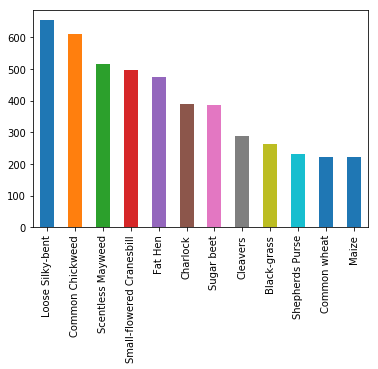

In [22]:
labels = preprocessing.LabelEncoder()
labels.fit(trainLabels[0])
print('Classes ' + str(labels.classes_))
encodedLabels = labels.transform(trainLabels[0])
clearAllLabels = np_utils.to_categorical(encodedLabels)
classes = clearAllLabels.shape[1]
print(str(classes))
trainLabels[0].value_counts().plot(kind='bar')

In [23]:
#Normalize and split into train/validation set
train_new = train_new/255
X_train, X_test, y_train, y_test = train_test_split(train_new, clearAllLabels, test_size=0.1,
                                                 random_state=SEED, stratify=clearAllLabels)

In [24]:
print('X train Length : ', len(X_train))
print('X test Length : ', len(X_test))

X train Length :  4275
X test Length :  475


In [25]:
# Define and train the base model 
EPOCHS=10
BATCH_SIZE=75

model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(5, 5), input_shape=(SCALE, SCALE, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(classes, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [26]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
# Fit the model
model.summary()
model.fit(X_train, y_train, batch_size=BATCH_SIZE, nb_epoch=EPOCHS, validation_data=(X_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 66, 66, 64)        4864      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 62, 62, 64)        102464    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 31, 31, 64)        256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 31, 31, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 61504)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 12)                738060    
Total para

C:\Users\varuraje.ORADEV\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


Train on 4275 samples, validate on 475 samples
Epoch 1/10
4275/4275 [==============================] - 307s 72ms/step - loss: 1.4878 - acc: 0.5184 - val_loss: 2.1901 - val_acc: 0.4105
Epoch 2/10
4275/4275 [==============================] - 328s 77ms/step - loss: 0.7880 - acc: 0.7392 - val_loss: 1.1044 - val_acc: 0.6400
Epoch 3/10
4275/4275 [==============================] - 319s 75ms/step - loss: 0.4145 - acc: 0.8711 - val_loss: 3.4151 - val_acc: 0.4632
Epoch 4/10
4275/4275 [==============================] - 316s 74ms/step - loss: 0.1893 - acc: 0.9411 - val_loss: 1.6526 - val_acc: 0.6232
Epoch 5/10
4275/4275 [==============================] - 307s 72ms/step - loss: 0.0825 - acc: 0.9787 - val_loss: 2.8544 - val_acc: 0.5011
Epoch 6/10
4275/4275 [==============================] - 292s 68ms/step - loss: 0.0341 - acc: 0.9942 - val_loss: 2.2120 - val_acc: 0.5832
Epoch 7/10
4275/4275 [==============================] - 292s 68ms/step - loss: 0.0193 - acc: 0.9963 - val_loss: 2.4024 - val_acc: 0

In [28]:
# The above model gives high training accuracy and low validatoin accuracy.
# It is an overfitting model and we need to optimize the model.
# Optimize the model exploring on the following: 
#1) Batch Normalization to transform inputs to be mean zero and unit variance for regularization. 
#2) Max pooling to provide abstracted form by down-sampling/reducing dimensionality. 
#3) Drop out layer to randomly ignore randomly selected neurons for regularization

In [29]:
# Optimize the model architecture with Batch Normalization
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(5, 5), input_shape=(SCALE, SCALE, 3), activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.1))

model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.1))

model.add(Conv2D(filters=256, kernel_size=(5, 5), activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters=256, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.1))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(classes, activation='softmax'))
 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 66, 66, 64)        4864      
_________________________________________________________________
batch_normalization_2 (Batch (None, 66, 66, 64)        256       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 62, 62, 64)        102464    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 31, 31, 64)        256       
_________________________________________________________________
dropout_2 (Dropout)          (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 27, 27, 128)       204928    
__________

In [30]:
# SETTING UP CHECKPOINTS, CALLBACKS AND REDUCING LEARNING RATE
lrr = ReduceLROnPlateau(monitor='val_acc', 
                        patience=3, 
                        verbose=2, 
                        factor=0.4, 
                        min_lr=0.00001)

filepath="weights.best_{epoch:02d}-{val_acc:.2f}.hdf5"
checkPoints = ModelCheckpoint(filepath, monitor='val_acc', 
                              verbose=2, save_best_only=True, mode='max')
filepath="weights.last_auto4.hdf5"
checkPointsFull = ModelCheckpoint(filepath, monitor='val_acc', 
                                 verbose=2, save_best_only=False, mode='max')

callbacksList = [checkPoints, lrr, checkPointsFull]

In [31]:
generator = ImageDataGenerator(rotation_range = 180,zoom_range = 0.1,width_shift_range = 0.1,
                               height_shift_range = 0.1,horizontal_flip = True,vertical_flip = True)
generator.fit(X_train)

In [32]:
# Store Training Results
EPOCHS=35
BATCH_SIZE=35

# Fit the model on batches with real-time data augmentation:
model.fit_generator(generator.flow(X_train, y_train, batch_size=BATCH_SIZE), steps_per_epoch=len(X_train) / BATCH_SIZE, 
                    epochs=EPOCHS, validation_data=(X_test, y_test), callbacks=callbacksList)

Epoch 1/35
123/122 [==============================] - 826s 7s/step - loss: 2.6380 - acc: 0.2646 - val_loss: 1.6454 - val_acc: 0.4716

Epoch 00001: val_acc improved from -inf to 0.47158, saving model to weights.best_01-0.47.hdf5

Epoch 00001: saving model to weights.last_auto4.hdf5
Epoch 2/35
123/122 [==============================] - 909s 7s/step - loss: 1.9481 - acc: 0.3717 - val_loss: 1.6367 - val_acc: 0.4547

Epoch 00002: val_acc did not improve from 0.47158

Epoch 00002: saving model to weights.last_auto4.hdf5
Epoch 3/35
123/122 [==============================] - 789s 6s/step - loss: 1.7532 - acc: 0.4158 - val_loss: 1.5827 - val_acc: 0.5179

Epoch 00003: val_acc improved from 0.47158 to 0.51789, saving model to weights.best_03-0.52.hdf5

Epoch 00003: saving model to weights.last_auto4.hdf5
Epoch 4/35
123/122 [==============================] - 798s 6s/step - loss: 1.5038 - acc: 0.4839 - val_loss: 1.8547 - val_acc: 0.4589

Epoch 00004: val_acc did not improve from 0.51789

Epoch 0000


Epoch 00031: val_acc did not improve from 0.90105

Epoch 00031: saving model to weights.last_auto4.hdf5
Epoch 32/35
123/122 [==============================] - 828s 7s/step - loss: 0.4069 - acc: 0.8611 - val_loss: 0.5453 - val_acc: 0.8000

Epoch 00032: val_acc did not improve from 0.90105

Epoch 00032: saving model to weights.last_auto4.hdf5
Epoch 33/35
123/122 [==============================] - 790s 6s/step - loss: 0.3969 - acc: 0.8637 - val_loss: 0.4473 - val_acc: 0.8232

Epoch 00033: val_acc did not improve from 0.90105

Epoch 00033: ReduceLROnPlateau reducing learning rate to 6.40000042039901e-05.

Epoch 00033: saving model to weights.last_auto4.hdf5
Epoch 34/35
123/122 [==============================] - 774s 6s/step - loss: 0.4187 - acc: 0.8569 - val_loss: 0.2428 - val_acc: 0.9053

Epoch 00034: val_acc improved from 0.90105 to 0.90526, saving model to weights.best_34-0.91.hdf5

Epoch 00034: saving model to weights.last_auto4.hdf5
Epoch 35/35
123/122 [==============================

In [33]:
# Evaluate on train set
print(model.evaluate(X_train, y_train))  

4275/4275 [==============================] - 194s 45ms/step
[0.21817141862640604, 0.9183625732248987]


In [34]:
# Evaluate on test set
print(model.evaluate(X_test, y_test))

475/475 [==============================] - 22s 46ms/step
[0.2199238321655675, 0.9157894740606609]


In [35]:
# PREDICTIONS
y_pred = model.predict(X_test)
y_class = np.argmax(y_pred, axis = 1) 
y_check = np.argmax(y_test, axis = 1) 

#Print confusion matrix
cmatrix = confusion_matrix(y_check, y_class)
print(cmatrix)

[[ 3  0  0  0  1  0 21  1  0  0  0  0]
 [ 0 36  0  0  0  0  0  1  0  0  0  2]
 [ 0  1 28  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 60  0  0  0  0  0  1  0  0]
 [ 3  0  0  0 19  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 47  0  0  0  0  0  0]
 [ 1  0  0  0  0  0 63  1  0  0  0  0]
 [ 0  0  0  0  0  0  1 21  0  0  0  0]
 [ 0  0  0  0  0  1  0  0 51  0  0  0]
 [ 0  0  0  1  0  0  0  0  0 22  0  0]
 [ 0  0  1  0  0  0  0  0  0  0 49  0]
 [ 0  1  0  0  0  1  0  0  0  1  0 36]]


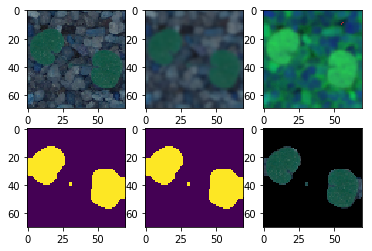

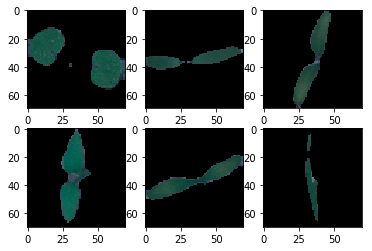

In [36]:
newTestImages = []
getEx = True

for i in testSet:
    blurr = cv2.GaussianBlur(i, (5, 5), 0)
    hsv = cv2.cvtColor(blurr, cv2.COLOR_BGR2HSV)
    
    lower = (25,40,50)
    upper = (75,255,255)
    mask = cv2.inRange(hsv, lower, upper)
    struc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, struc)
    boolean = mask>0
    masking = np.zeros_like(i, np.uint8)
    masking[boolean] = i[boolean]
    newTestImages.append(masking)
    
    if getEx:
        plt.subplot(2,3,1);plt.imshow(i)
        plt.subplot(2,3,2);plt.imshow(blurr)
        plt.subplot(2,3,3);plt.imshow(hsv)
        plt.subplot(2,3,4);plt.imshow(mask)
        plt.subplot(2,3,5);plt.imshow(boolean)
        plt.subplot(2,3,6);plt.imshow(masking)
        plt.show()
        getEx=False

newTestImages = np.asarray(newTestImages)

# OTHER MASKED IMAGES
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(newTestImages[i])

In [37]:
newTestImages = newTestImages/255
pred = np.argmax(model.predict(newTestImages), axis=1)
predLabel = labels.classes_[pred]
predictions_result = pd.DataFrame({'file': tests, 'species': predLabel})

# Store the Predictions into a CSV file
predictions_result.to_csv("CNN_Seeding_Classification_Prediction.csv", index=False)